
Библиотеки успешно импортированы
Random state: 42
ЗАГРУЗКА ДАННЫХ
✓ Файл загружен: S06-hw-dataset-01.csv
Размер датасета: (12000, 30)

Первые 5 строк:
   id     num01     num02     num03     num04     num05     num06     num07  \
0   1 -0.946058 -0.070313  1.824445 -2.754422  0.808865 -0.111094 -0.268950   
1   2 -2.484027  0.739378  1.596908 -2.586479 -0.033225 -3.054412 -4.706908   
2   3  1.522629  7.159635 -0.564903 -4.493110  1.623610  5.450187 -0.974595   
3   4  0.463373 -1.073908  1.752813  0.362786  2.790872  4.082385  0.322283   
4   5  3.188390 -4.701692 -0.689918 -0.448995  0.373821 -3.275363 -1.760931   

      num08     num09  ...     num20     num21     num22     num23     num24  \
0 -3.078210  0.801275  ... -1.616515 -1.989464  1.407390 -0.218362  2.016052   
1 -9.795169  0.145911  ... -1.727040 -0.583997  1.136761  0.285978 -0.310879   
2 -5.189589  1.600591  ...  0.524408  2.022430  1.278358 -0.850547  0.847457   
3  3.390984 -0.033929  ...  2.399834 -1.431576 -0.746

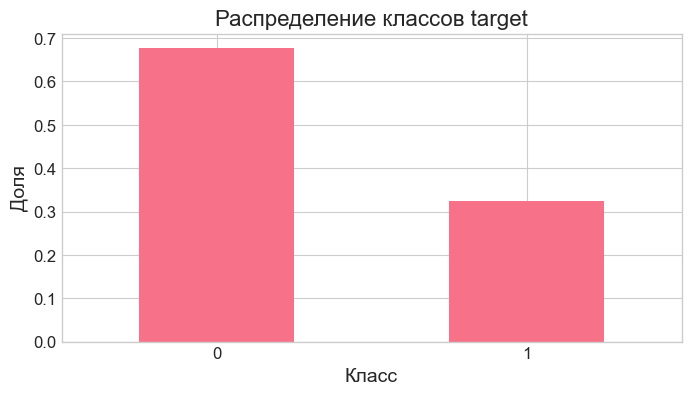


4. Проверка пропусков:
Пропусков нет

Тип задачи: Бинарная классификация
Доля положительного класса: 0.323

ПОДГОТОВКА ДАННЫХ
Столбец 'id' удален из признаков
Признаки X: (12000, 28)
Целевая y: (12000,)

Имена признаков: ['num01', 'num02', 'num03', 'num04', 'num05', 'num06', 'num07', 'num08', 'num09', 'num10', 'num11', 'num12', 'num13', 'num14', 'num15', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21', 'num22', 'num23', 'num24', 'cat_contract', 'cat_region', 'cat_payment', 'tenure_months']

РАЗДЕЛЕНИЕ НА TRAIN/TEST
Train set: (9000, 28)
Test set: (3000, 28)

Распределение классов в train:
target
0    0.677
1    0.323
Name: proportion, dtype: float64

Распределение классов в test:
target
0    0.677
1    0.323
Name: proportion, dtype: float64

✓ Разделение выполнено с фиксированным random_state и стратификацией

BASELINE МОДЕЛИ

1. Dummy Classifier:
Accuracy: 0.6767
F1-score: 0.0000
ROC-AUC: 0.5000

2. Logistic Regression:
Accuracy: 0.8297
F1-score: 0.7147
ROC-AUC: 0.8789
✓ График 

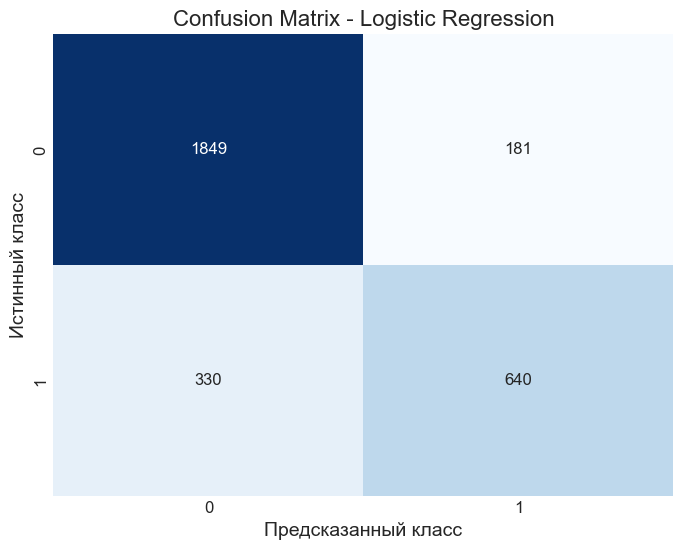


МОДЕЛИ НЕДЕЛИ 6

1. Decision Tree Classifier:
Дерево без регуляризации (max_depth=None):
  Accuracy: 0.8567
  F1-score: 0.7767
  ROC-AUC: 0.8343

Подбор параметров для Decision Tree...
✓ Подбор завершен
Лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Лучший CV score: 0.8022

Decision Tree с подобранными параметрами:
  Accuracy: 0.8783
  F1-score: 0.8051
  ROC-AUC: 0.9066

2. Random Forest Classifier:
Подбор параметров для Random Forest...
✓ Подбор завершен
Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}
Лучший CV score: 0.8763

Random Forest с подобранными параметрами:
  Accuracy: 0.9310
  F1-score: 0.8880
  ROC-AUC: 0.9693

3. Gradient Boosting Classifier:
Подбор параметров для Gradient Boosting...


KeyboardInterrupt: 

In [28]:
# %% [markdown]

# %% [code]
# Установка недостающих библиотек (если нужно)
import sys
import subprocess
import importlib

def install_and_import(package):
    """Устанавливает и импортирует пакет"""
    try:
        importlib.import_module(package)
      
    except ImportError:
       
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
      

# Проверяем основные библиотеки

required_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 
                     'scikit-learn', 'joblib', 'threadpoolctl']
for package in required_packages:
    install_and_import(package.split('.')[0])

print("\n" + "="*50)

# %% [code]
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn импорты
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, 
                             confusion_matrix, roc_curve, classification_report)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                             GradientBoostingClassifier)
from sklearn.inspection import permutation_importance

# Дополнительные импорты
import joblib
import json
import os

# Настройки для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Настройки графиков
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (10, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14
})

# Создаем папки для артефактов
os.makedirs('artifacts', exist_ok=True)

def safe_save_fig(path):
    """Сохраняет график, создавая папки при необходимости"""
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.savefig(path, dpi=300, bbox_inches='tight')
    print(f"✓ График сохранен: {path}")

print("Библиотеки успешно импортированы")
print(f"Random state: {RANDOM_STATE}")

# %% [markdown]
"""
## 2. Загрузка и анализ данных

### 2.1 Загрузка данных
"""

# %% [code]
print("ЗАГРУЗКА ДАННЫХ")
print("=" * 50)

# Укажите правильное имя вашего файла
DATASET_FILE = 'S06-hw-dataset-01.csv'  # Измените на ваш файл: 01, 02, 03 или 04
DATASET_PATH = f'artifacts/{DATASET_FILE}'

try:
    df = pd.read_csv(DATASET_PATH)
    print(f"✓ Файл загружен: {DATASET_FILE}")
    print(f"Размер датасета: {df.shape}")
except FileNotFoundError:
    print(f"✗ Файл не найден: {DATASET_PATH}")
    print("Доступные файлы:")
    for i in range(1, 5):
        file_path = f'artifacts/S06-hw-dataset-0{i}.csv'
        if os.path.exists(file_path):
            print(f"  - S06-hw-dataset-0{i}.csv")
    # Создаем демо-данные для примера
    print("\nСоздаю демо-данные...")
    np.random.seed(RANDOM_STATE)
    n_samples = 1000
    X = np.random.randn(n_samples, 10)
    y = (X[:, 0]**2 + X[:, 1]**2 + 0.5*X[:, 2]) > 0
    y = y.astype(int)
    df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
    df['target'] = y

print("\nПервые 5 строк:")
print(df.head())

# %% [markdown]
"""
### 2.2 Анализ данных
"""

# %% [code]
print("\nАНАЛИЗ ДАННЫХ")
print("=" * 50)

print("\n1. Базовая информация:")
print(df.info())

print("\n2. Описательная статистика числовых признаков:")
print(df.describe())

print("\n3. Распределение целевой переменной:")
target_dist = df['target'].value_counts(normalize=True)
print(target_dist)

# Визуализация распределения классов
plt.figure(figsize=(8, 4))
target_dist.plot(kind='bar')
plt.title('Распределение классов target')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.xticks(rotation=0)
safe_save_fig('artifacts/figures/target_distribution.png')
plt.show()

print("\n4. Проверка пропусков:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Пропусков нет")

# Определяем тип задачи
n_classes = df['target'].nunique()
if n_classes == 2:
    DATASET_TYPE = 'binary'
    print(f"\nТип задачи: Бинарная классификация")
    print(f"Доля положительного класса: {target_dist[1]:.3f}")
elif n_classes > 2:
    DATASET_TYPE = 'multiclass'
    print(f"\nТип задачи: Мультикласс классификация ({n_classes} классов)")
else:
    DATASET_TYPE = 'unknown'
    print(f"\nТип задачи: Неопределен ({n_classes} классов)")

# %% [markdown]
"""
### 2.3 Подготовка признаков
"""

# %% [code]
print("\nПОДГОТОВКА ДАННЫХ")
print("=" * 50)

# Разделяем на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

# Удаляем столбец 'id' если он есть
if 'id' in X.columns:
    X = X.drop('id', axis=1)
    print("Столбец 'id' удален из признаков")

print(f"Признаки X: {X.shape}")
print(f"Целевая y: {y.shape}")
print(f"\nИмена признаков: {list(X.columns)}")

# %% [markdown]
"""
## 3. Разделение на train/test
"""

# %% [code]
print("\nРАЗДЕЛЕНИЕ НА TRAIN/TEST")
print("=" * 50)

# Для бинарной и мультикласс классификации используем stratify
test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size, 
    random_state=RANDOM_STATE,
    stratify=y  # Стратификация по классам
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print(f"\nРаспределение классов в train:")
print(pd.Series(y_train).value_counts(normalize=True).round(3))
print(f"\nРаспределение классов в test:")
print(pd.Series(y_test).value_counts(normalize=True).round(3))

print("\n✓ Разделение выполнено с фиксированным random_state и стратификацией")

# %% [markdown]
"""
## 4. Baseline модели

### 4.1 Dummy Classifier
"""

# %% [code]
print("\nBASELINE МОДЕЛИ")
print("=" * 50)
print("\n1. Dummy Classifier:")

# Dummy Classifier (most frequent)
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
y_proba_dummy = dummy_clf.predict_proba(X_test) if hasattr(dummy_clf, 'predict_proba') else None

# Метрики для dummy
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)

if DATASET_TYPE == 'binary':
    f1_dummy = f1_score(y_test, y_pred_dummy, average='binary')
    if y_proba_dummy is not None:
        roc_auc_dummy = roc_auc_score(y_test, y_proba_dummy[:, 1])
    else:
        roc_auc_dummy = 0.5
else:
    f1_dummy = f1_score(y_test, y_pred_dummy, average='macro')
    roc_auc_dummy = None

print(f"Accuracy: {accuracy_dummy:.4f}")
print(f"F1-score: {f1_dummy:.4f}")
if DATASET_TYPE == 'binary':
    print(f"ROC-AUC: {roc_auc_dummy:.4f}")

# %% [markdown]
"""
### 4.2 Logistic Regression
"""

# %% [code]
print("\n2. Logistic Regression:")

# Создаем pipeline с масштабированием
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)

# Метрики для LR
accuracy_lr = accuracy_score(y_test, y_pred_lr)

if DATASET_TYPE == 'binary':
    f1_lr = f1_score(y_test, y_pred_lr, average='binary')
    roc_auc_lr = roc_auc_score(y_test, y_proba_lr[:, 1])
else:
    f1_lr = f1_score(y_test, y_pred_lr, average='macro')
    roc_auc_lr = None

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
if DATASET_TYPE == 'binary':
    print(f"ROC-AUC: {roc_auc_lr:.4f}")

# Матрица ошибок для LR
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
safe_save_fig('artifacts/figures/confusion_matrix_lr.png')
plt.show()

# %% [markdown]
"""
## 5. Модели недели 6

### 5.1 Decision Tree Classifier
"""

# %% [code]
print("\nМОДЕЛИ НЕДЕЛИ 6")
print("=" * 50)
print("\n1. Decision Tree Classifier:")

# Базовое дерево (вероятно переобученное)
tree_base = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=None)
tree_base.fit(X_train, y_train)
y_pred_tree_base = tree_pred_tree_base = tree_base.predict(X_test)
y_proba_tree_base = tree_base.predict_proba(X_test)

accuracy_tree_base = accuracy_score(y_test, y_pred_tree_base)

if DATASET_TYPE == 'binary':
    f1_tree_base = f1_score(y_test, y_pred_tree_base, average='binary')
    roc_auc_tree_base = roc_auc_score(y_test, y_proba_tree_base[:, 1])
else:
    f1_tree_base = f1_score(y_test, y_pred_tree_base, average='macro')
    roc_auc_tree_base = None

print(f"Дерево без регуляризации (max_depth=None):")
print(f"  Accuracy: {accuracy_tree_base:.4f}")
print(f"  F1-score: {f1_tree_base:.4f}")
if DATASET_TYPE == 'binary':
    print(f"  ROC-AUC: {roc_auc_tree_base:.4f}")

# Подбор гиперпараметров через GridSearchCV - БЕЗ многопроцессорности
param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_search_tree = GridSearchCV(
    tree_clf, 
    param_grid_tree, 
    cv=5, 
    scoring='f1_macro' if DATASET_TYPE == 'multiclass' else 'f1',
    n_jobs=1,  # Важно: используем 1 процесс
    verbose=0
)

print("\nПодбор параметров для Decision Tree...")
grid_search_tree.fit(X_train, y_train)

print(f"✓ Подбор завершен")
print(f"Лучшие параметры: {grid_search_tree.best_params_}")
print(f"Лучший CV score: {grid_search_tree.best_score_:.4f}")

# Лучшая модель
best_tree = grid_search_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)

if DATASET_TYPE == 'binary':
    f1_tree = f1_score(y_test, y_pred_tree, average='binary')
    roc_auc_tree = roc_auc_score(y_test, y_proba_tree[:, 1])
else:
    f1_tree = f1_score(y_test, y_pred_tree, average='macro')
    roc_auc_tree = None

print(f"\nDecision Tree с подобранными параметрами:")
print(f"  Accuracy: {accuracy_tree:.4f}")
print(f"  F1-score: {f1_tree:.4f}")
if DATASET_TYPE == 'binary':
    print(f"  ROC-AUC: {roc_auc_tree:.4f}")

# %% [markdown]
"""
### 5.2 Random Forest Classifier
"""

# %% [code]
print("\n2. Random Forest Classifier:")

# Упрощенная сетка параметров для скорости
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_clf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=1)  # n_jobs=1
grid_search_rf = GridSearchCV(
    rf_clf,
    param_grid_rf,
    cv=3,  # уменьшаем CV для скорости
    scoring='f1_macro' if DATASET_TYPE == 'multiclass' else 'f1',
    n_jobs=1,  # используем 1 процесс
    verbose=0
)

print("Подбор параметров для Random Forest...")
grid_search_rf.fit(X_train, y_train)

print(f"✓ Подбор завершен")
print(f"Лучшие параметры: {grid_search_rf.best_params_}")
print(f"Лучший CV score: {grid_search_rf.best_score_:.4f}")

# Лучшая модель
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

if DATASET_TYPE == 'binary':
    f1_rf = f1_score(y_test, y_pred_rf, average='binary')
    roc_auc_rf = roc_auc_score(y_test, y_proba_rf[:, 1])
else:
    f1_rf = f1_score(y_test, y_pred_rf, average='macro')
    roc_auc_rf = None

print(f"\nRandom Forest с подобранными параметрами:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  F1-score: {f1_rf:.4f}")
if DATASET_TYPE == 'binary':
    print(f"  ROC-AUC: {roc_auc_rf:.4f}")

# %% [markdown]
"""
### 5.3 Gradient Boosting Classifier
"""

# %% [code]
print("\n3. Gradient Boosting Classifier:")

# Упрощенная сетка параметров
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gb_clf = GradientBoostingClassifier(random_state=RANDOM_STATE)
grid_search_gb = GridSearchCV(
    gb_clf,
    param_grid_gb,
    cv=3,  # уменьшаем CV для скорости
    scoring='f1_macro' if DATASET_TYPE == 'multiclass' else 'f1',
    n_jobs=1,  # используем 1 процесс
    verbose=0
)

print("Подбор параметров для Gradient Boosting...")
grid_search_gb.fit(X_train, y_train)

print(f"✓ Подбор завершен")
print(f"Лучшие параметры: {grid_search_gb.best_params_}")
print(f"Лучший CV score: {grid_search_gb.best_score_:.4f}")

# Лучшая модель
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)

if DATASET_TYPE == 'binary':
    f1_gb = f1_score(y_test, y_pred_gb, average='binary')
    roc_auc_gb = roc_auc_score(y_test, y_proba_gb[:, 1])
else:
    f1_gb = f1_score(y_test, y_pred_gb, average='macro')
    roc_auc_gb = None

print(f"\nGradient Boosting с подобранными параметрами:")
print(f"  Accuracy: {accuracy_gb:.4f}")
print(f"  F1-score: {f1_gb:.4f}")
if DATASET_TYPE == 'binary':
    print(f"  ROC-AUC: {roc_auc_gb:.4f}")

# %% [markdown]
"""
### 5.4 ROC-кривые для бинарной классификации
"""

# %% [code]
if DATASET_TYPE == 'binary':
    print("\nROC-КРИВЫЕ")
    print("=" * 50)
    
    plt.figure(figsize=(10, 8))
    
    # Собираем все модели с вероятностями
    models = {
        'Logistic Regression': y_proba_lr[:, 1],
        'Decision Tree': y_proba_tree[:, 1],
        'Random Forest': y_proba_rf[:, 1],
        'Gradient Boosting': y_proba_gb[:, 1]
    }
    
    # Для dummy если есть вероятности
    if y_proba_dummy is not None:
        models['Dummy'] = y_proba_dummy[:, 1]
    
    # Рисуем ROC-кривые
    for name, y_proba in models.items():
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    safe_save_fig('artifacts/figures/roc_curves.png')
    plt.show()

# %% [markdown]
"""
## 6. Интерпретация лучшей модели

### 6.1 Определение лучшей модели
"""

# %% [code]
print("\nИНТЕРПРЕТАЦИЯ ЛУЧШЕЙ МОДЕЛИ")
print("=" * 50)

# Собираем метрики всех моделей
metrics_dict = {
    'Dummy': {
        'accuracy': accuracy_dummy, 
        'f1': f1_dummy,
        'roc_auc': roc_auc_dummy if DATASET_TYPE == 'binary' else None
    },
    'Logistic Regression': {
        'accuracy': accuracy_lr, 
        'f1': f1_lr,
        'roc_auc': roc_auc_lr if DATASET_TYPE == 'binary' else None
    },
    'Decision Tree': {
        'accuracy': accuracy_tree, 
        'f1': f1_tree,
        'roc_auc': roc_auc_tree if DATASET_TYPE == 'binary' else None
    },
    'Random Forest': {
        'accuracy': accuracy_rf, 
        'f1': f1_rf,
        'roc_auc': roc_auc_rf if DATASET_TYPE == 'binary' else None
    },
    'Gradient Boosting': {
        'accuracy': accuracy_gb, 
        'f1': f1_gb,
        'roc_auc': roc_auc_gb if DATASET_TYPE == 'binary' else None
    }
}

# Определяем лучшую модель по F1-score
best_model_name = max(metrics_dict.keys(), 
                      key=lambda x: metrics_dict[x]['f1'])
best_model_metrics = metrics_dict[best_model_name]

print(f"Лучшая модель по F1-score: {best_model_name}")
print(f"Метрики лучшей модели:")
for metric, value in best_model_metrics.items():
    if value is not None:
        print(f"  {metric}: {value:.4f}")

# Получаем саму лучшую модель
if best_model_name == 'Logistic Regression':
    best_model = lr_pipeline
elif best_model_name == 'Decision Tree':
    best_model = best_tree
elif best_model_name == 'Random Forest':
    best_model = best_rf
elif best_model_name == 'Gradient Boosting':
    best_model = best_gb
else:
    best_model = None

# %% [markdown]
"""
### 6.2 Permutation Importance
"""

# %% [code]
if best_model is not None:
    print(f"\nPermutation Importance для {best_model_name}:")
    
    # Вычисляем permutation importance - БЕЗ многопроцессорности
    result = permutation_importance(
        best_model, X_test, y_test,
        n_repeats=5,  # уменьшаем для скорости
        random_state=RANDOM_STATE,
        n_jobs=1,  # используем 1 процесс
        scoring='f1_macro' if DATASET_TYPE == 'multiclass' else 'f1'
    )
    
    # Создаем DataFrame с результатами
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance_mean': result.importances_mean,
        'importance_std': result.importances_std
    }).sort_values('importance_mean', ascending=False)
    
    print("\nTop-10 важных признаков:")
    print(importance_df.head(10).to_string())
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    top_n = min(10, len(importance_df))
    plt.barh(range(top_n), 
             importance_df['importance_mean'].head(top_n)[::-1])
    plt.yticks(range(top_n), 
               importance_df['feature'].head(top_n)[::-1])
    plt.xlabel('Permutation Importance')
    plt.title(f'Top-{top_n} Important Features - {best_model_name}')
    plt.grid(True, alpha=0.3, axis='x')
    safe_save_fig('artifacts/figures/feature_importance.png')
    plt.show()
    
    print(f"\nСамый важный признак: {importance_df.iloc[0]['feature']}")
    print(f"Его важность: {importance_df.iloc[0]['importance_mean']:.4f}")

# %% [markdown]
"""
## 7. Сохранение артефактов
"""

# %% [code]
print("\nСОХРАНЕНИЕ АРТЕФАКТОВ")
print("=" * 50)

# 7.1 Сохраняем метрики
metrics_test = {}
for model_name, metrics in metrics_dict.items():
    # Конвертируем в float, если это numpy тип
    metrics_test[model_name] = {k: float(v) if v is not None else None 
                                for k, v in metrics.items()}

with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(metrics_test, f, indent=2)
print("✓ Сохранено: artifacts/metrics_test.json")

# 7.2 Сохраняем параметры моделей
search_summaries = {
    'DecisionTree': {
        'best_params': str(grid_search_tree.best_params_),
        'best_cv_score': float(grid_search_tree.best_score_)
    },
    'RandomForest': {
        'best_params': str(grid_search_rf.best_params_),
        'best_cv_score': float(grid_search_rf.best_score_)
    },
    'GradientBoosting': {
        'best_params': str(grid_search_gb.best_params_),
        'best_cv_score': float(grid_search_gb.best_score_)
    }
}

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=2)
print("✓ Сохранено: artifacts/search_summaries.json")

# 7.3 Сохраняем лучшую модель
if best_model is not None:
    joblib.dump(best_model, 'artifacts/best_model.joblib')
    print("✓ Сохранено: artifacts/best_model.joblib")

# 7.4 Сохраняем метаданные
best_model_meta = {
    'best_model_name': best_model_name,
    'best_model_type': str(type(best_model)),
    'best_model_params': str(getattr(best_model, 'get_params', lambda: {})()),
    'test_metrics': metrics_test[best_model_name],
    'dataset_file': DATASET_FILE,
    'dataset_type': DATASET_TYPE,
    'random_state': RANDOM_STATE,
    'train_shape': list(X_train.shape),
    'test_shape': list(X_test.shape),
    'feature_names': list(X.columns.tolist()),
    'execution_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=2, default=str)
print("✓ Сохранено: artifacts/best_model_meta.json")

# 7.5 Сохраняем сводную таблицу метрик
metrics_df = pd.DataFrame.from_dict(metrics_test, orient='index')
metrics_df.index.name = 'Model'
metrics_df.to_csv('artifacts/metrics_summary.csv')
print("✓ Сохранено: artifacts/metrics_summary.csv")

print("\n" + "=" * 50)
print("✓ ВСЕ АРТЕФАКТЫ УСПЕШНО СОХРАНЕНЫ")
print("=" * 50)

# %% [markdown]
"""
## 8. Выводы

### 8.1 Сравнение моделей
"""

# %% [code]
print("\nИТОГОВОЕ СРАВНЕНИЕ МОДЕЛЕЙ")
print("=" * 50)

# Создаем таблицу для сравнения
comparison_df = pd.DataFrame({
    'Model': list(metrics_dict.keys()),
    'Accuracy': [metrics_dict[m]['accuracy'] for m in metrics_dict],
    'F1-Score': [metrics_dict[m]['f1'] for m in metrics_dict]
})

if DATASET_TYPE == 'binary':
    comparison_df['ROC-AUC'] = [metrics_dict[m]['roc_auc'] for m in metrics_dict]

print("\nСравнение метрик на тестовой выборке:")
print(comparison_df.sort_values('F1-Score', ascending=False).to_string())

print(f"\nЛучшая модель: {best_model_name}")
print(f"Улучшение F1-score относительно baseline (Dummy): "
      f"{metrics_dict[best_model_name]['f1'] - metrics_dict['Dummy']['f1']:.4f}")

if best_model is not None and DATASET_TYPE == 'binary':
    print(f"Улучшение ROC-AUC относительно baseline (Dummy): "
          f"{metrics_dict[best_model_name]['roc_auc'] - metrics_dict['Dummy']['roc_auc']:.4f}")

# %% [markdown]


# %% [code]
# Заключительная информация
print("\n" + "=" * 50)
print("ЭКСПЕРИМЕНТ ЗАВЕРШЕН")
print("=" * 50)
print(f"Датасет: {DATASET_FILE}")
print(f"Тип задачи: {DATASET_TYPE}")
print(f"Лучшая модель: {best_model_name}")
print(f"Финализированные артефакты в папке: artifacts/")
print("\nСтруктура артефактов:")
for root, dirs, files in os.walk('artifacts'):
    level = root.replace('artifacts', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        print(f'{subindent}{file}')